In [2]:
# Import all the things
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.figure_factory as ff
import waterfall_chart
import altair as alt
from vega_datasets import data as vega_data
import plotly.plotly as py
import plotly.graph_objs as go
from itertools import product
import colorlover as cl
import scipy

# General settings
pd.options.display.max_rows = 10
pd.options.display.max_seq_items = 200

static_dir = "slides/static/"
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=0.1, y=-2.5, z=0.1)
)

In [3]:
%store -r df

In [4]:
temp_df = df[df.state_abbr.isin(['MI','OH'])]
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(temp_df['High School Only or Less, 2012-2016'], temp_df['republican_shift'])
slope, intercept, r_value, p_value, std_err

(0.47091422290620916,
 -15.757740825130597,
 0.8362883068882053,
 5.710199756114619e-46,
 0.023749403990213473)

In [6]:
data = []
states = ['NY', 'ID', 'UT', 'MI', 'IA', 'OH', 'PA', 'FL', 'MN', 'WI', 'Other', 'KY', 'MO', 'NE', 'WV', 'IL', 'ND', 'SD', 'VA', 'IN', 'TN']
colors = {
'ID': 'darkred',
'UT': 'maroon',
'MI': 'red',
'IA': 'green',
'OH': 'blue',
'PA': 'purple',
'FL': 'orange',
'MN': 'yellow',
'WI': 'black',
    'NY': 'peachpuff',
    'KY': 'cornflowerblue',
    'MO': 'chartreuse',
    'NE': 'khaki',
    'WV': 'lavender',
    'IL': 'lightslategrey',
    'ND': 'teal',
    'SD': 'indigo',
    'VA': 'mediumorchid',
    'IN': 'forestgreen',
    'TN': 'dodgerblue',
'Other': 'lightgray',
}
for state in states:
    
    if state != 'Other':
        cell_df = df[(df.state_abbr == state)]
    else:
        cell_df = df[~df.state_abbr.isin(states)]
    
    trace = go.Scatter3d(
        x=list(cell_df['percent_white']),
        y=list(cell_df['High School Only or Less, 2012-2016']),
        z=list(cell_df['republican_shift']),
        text=list(cell_df['GEO.display-label']),
        mode='markers',
        name=state,
        marker=dict(
            size=4,
            color=colors[state],
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5
            ),
            opacity=0.8,
            )
        )
    data.append(trace)

layout = go.Layout(
        margin=dict(l=0, r=0, b=0, t=0),
        scene = dict(
            aspectmode='cube',
            xaxis = dict(title='% White'),
            yaxis = dict(title='% High School Only or Less, 2012-2016'),
            zaxis = dict(title='Republican Shift (%age Points)'),),       
        legend=dict(x=-.1, y=1.2)
        )
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename='temp.html')

'file:///Users/bwarren/SideProjects/voting/temp.html'

What are the "outlier districts"?

Elliot County is fascinating.  It was the last county to never vote Republican until 2016.

https://apnews.com/ee19ceb7cf0d4af4ab73c393708148bf


# State Analysis

In [5]:
states = ['IA']
state_static_dir = static_dir + "_".join(states) + '/'
mydf = df[df.state_abbr.isin(states)]

import os
if not os.path.exists(state_static_dir):
    os.makedirs(state_static_dir)

def color_urban_rural_code(x):
    if x.item() == 1:
        return 'green'
    elif x.item() == 2:
        return 'purple'
    elif x.item() == 3 :
        return 'orange'
    else:
        return 'black'

def color_winner(x):
    if x['votes_dem_2016'] > x['votes_gop_2016'] and x['votes_dem_2012'] > x['votes_gop_2012']:
        return 'blue'
    if x['votes_dem_2016'] < x['votes_gop_2016'] and x['votes_dem_2012'] < x['votes_gop_2012']:
        return 'red'
    if x['votes_dem_2016'] > x['votes_gop_2016'] and x['votes_dem_2012'] < x['votes_gop_2012']:
        return 'orchid'
    if x['votes_dem_2016'] < x['votes_gop_2016'] and x['votes_dem_2012'] > x['votes_gop_2012']:
        return 'limegreen'
    
mydf['color'] = mydf.apply(color_winner, axis=1)
difference = mydf['change_in_net_r_votes'].sum()


In [8]:
pd.options.display.max_rows=200
mydf[['fips_code', 'dem_percent_increase', 'rep_percent_increase']]

,fips_code,dem_percent_increase,rep_percent_increase
42,19097,-34.711588,39.558859
65,19143,-39.273927,13.617978
83,19173,-40.126883,25.476190
152,19165,-33.184765,11.196516
168,19105,-31.465361,21.349745
196,19109,-33.865063,14.713065
198,19075,-29.369025,7.395957
233,19179,-35.109099,28.522945
297,19049,-4.882789,-7.805554
323,19021,-22.590280,7.629727


In [6]:
map_sizes = {'OH': {'width': 700, 'height': 400}, 'PA': {'width': 800, 'height': 400}}

In [7]:
# ceiling_side = 20


# x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
# trace1 = go.Scatter3d(
#     x=mydf['rep_percent_increase'],
#     y=mydf['dem_percent_increase'],
#     z=mydf['change_in_net_r_votes'],
#     text=mydf['GEO.display-label'],
#     mode='markers',
#     marker=dict(
#         size=4,
#         color=mydf['color'],
#         line=dict(
#             color='rgba(217, 217, 217, 0.14)',
#             width=0.5
#         ),
#         opacity=0.8,
#     )
# )

# xs = np.arange(mydf['rep_percent_increase'].min(), mydf['rep_percent_increase'].max(), (mydf['rep_percent_increase'].max()-mydf['rep_percent_increase'].min())/ceiling_side)
# ys = np.arange(mydf['dem_percent_increase'].min(), mydf['dem_percent_increase'].max(), (mydf['dem_percent_increase'].max()-mydf['dem_percent_increase'].min())/ceiling_side)
# points = list(product(xs, ys))

# ceiling = go.Scatter3d(
#     x=[point[0] for point in points],
#     y=[point[1] for point in points],
#     z=np.repeat(difference, len(points)),
#     text=mydf['GEO.display-label'],
#     mode='markers',
#     marker=dict(
#         size=4,
#         color='black',
#         line=dict(
#             color='rgba(217, 217, 217, 0.14)',
#             width=0.5
#         ),
#         opacity=0.8,
#     )
# )


# floor = go.Scatter3d(
#     x=[point[0] for point in points],
#     y=[point[1] for point in points],
#     z=np.repeat(-difference, len(points)),
#     text=mydf['GEO.display-label'],
#     mode='markers',
#     marker=dict(
#         size=4,
#         color='black',
#         line=dict(
#             color='rgba(217, 217, 217, 0.14)',
#             width=0.5
#         ),
#         opacity=0.8,
#     )
# )

# data = [trace1, ceiling, floor]
# layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     ),
#    scene = dict(
#         aspectmode='cube',
#         camera=camera,
#         xaxis = dict(title='% Change in Republican Vote Total'),
#                     yaxis = dict(title='% Change in Democratic Vote Total'),
#                     zaxis = dict(title='Overall Shift in Vote Outcome Positive=Rep'),
#        ),
# )
# fig = go.Figure(data=data, layout=layout)
# plotly.offline.plot(fig)

In [8]:
# import plotly.plotly as py
# import plotly.graph_objs as go

# import numpy as np
# from itertools import product
# import colorlover as cl


# ceiling_side = 20

# x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
# trace1 = go.Scatter3d(
#     x=mydf['rep_vote_change'],
#     y=mydf['dem_vote_change'],
#     z=mydf['change_in_net_r_votes'],
#     text=mydf['GEO.display-label'],
#     mode='markers',
#     marker=dict(
#         size=4,
#         color=mydf['color'],
#         line=dict(
#             color='rgba(217, 217, 217, 0.14)',
#             width=0.5
#         ),
#         opacity=0.8,
#     )
# )

# xs = np.arange(mydf['rep_vote_change'].min(), mydf['rep_vote_change'].max(), (mydf['rep_vote_change'].max()-mydf['rep_vote_change'].min())/ceiling_side)
# ys = np.arange(mydf['dem_vote_change'].min(), mydf['dem_vote_change'].max(), (mydf['dem_vote_change'].max()-mydf['dem_vote_change'].min())/ceiling_side)
# points = list(product(xs, ys))

# ceiling = go.Scatter3d(
#     x=[point[0] for point in points],
#     y=[point[1] for point in points],
#     z=np.repeat(difference, len(points)),
#     text=mydf['GEO.display-label'],
#     mode='markers',
#     marker=dict(
#         size=4,
#         color='black',
#         line=dict(
#             color='rgba(217, 217, 217, 0.14)',
#             width=0.5
#         ),
#         opacity=0.8,
#     )
# )


# floor = go.Scatter3d(
#     x=[point[0] for point in points],
#     y=[point[1] for point in points],
#     z=np.repeat(-difference, len(points)),
#     text=mydf['GEO.display-label'],
#     mode='markers',
#     marker=dict(
#         size=4,
#         color='black',
#         line=dict(
#             color='rgba(217, 217, 217, 0.14)',
#             width=0.5
#         ),
#         opacity=0.8,
#     )
# )

# data = [trace1, ceiling, floor]
# layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     ),
#     scene = dict(
#         aspectmode='cube',
#         xaxis = dict(title='Raw Change from 2012 Republican Vote'),
#         yaxis = dict(title='Raw Change from 2012 Democratic Vote'),
#         zaxis = dict(title='Overall Shift in Vote Outcome Positive=Rep'),
#         camera=camera,
#     ),
# )
# fig = go.Figure(data=data, layout=layout)
# plotly.offline.plot(fig)


Older males vs education vs shift

In [6]:
df_wi = mydf[df.state_abbr.isin(['WI'])]
df_oh = mydf[df.state_abbr.isin(['OH'])]
wisconsin = go.Scatter(
    x = df_wi['High School Only or Less, 2012-2016'],
    y = df_wi['republican_shift'],
    name = 'Wisconsin',
    mode = 'markers',
    text=df_wi.State,
    marker = dict(
        size = 10,
        color = 'purple',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)
ohio = go.Scatter(
    x = df_oh['High School Only or Less, 2012-2016'],
    y = df_oh['republican_shift'],
    name = 'Ohio',
    mode = 'markers',
    text=df_wi.State,
    marker = dict(
        size = 10,
        color = 'orange',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)
datarange = np.array([-50, 90])
xy = go.Scatter(
    x=datarange,
    y=datarange,
    mode='lines',
    marker= dict(color='black'),
    name='X=Y'
)
data = [wisconsin,ohio]

layout = dict(title = 'Republican Shift vs Noncollege % by County',
              yaxis = dict(zeroline = False, title='Change toward R Presidential vote in % points'),
              xaxis = dict(zeroline = False, title='Noncollege %'),
              width=600,
              height=500,
             )

fig = dict(data=data, layout=layout)

# IPython notebook
plotly.offline.plot(fig, filename=static_dir+'WI/wi_oh.html')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(mydf['High School Only or Less, 2012-2016'], mydf['republican_shift'])
slope, intercept, r_value**2, p_value

/Users/bwarren/.virtualenvs/voting-bFP2zqbV/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/bwarren/.virtualenvs/voting-bFP2zqbV/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(0.4663880634283249,
 -15.168765032921508,
 0.6509252087790803,
 6.085208536464393e-38)

In [29]:
if states == ['IA'] and 'Bernie' not in mydf.columns:
    bernie_df = pd.read_csv('data/bernie.csv')
    mydf = pd.merge(left=mydf, right=bernie_df, how='left', left_on='county', right_on='County')

    gop_change = go.Scatter(
        x = mydf['BerniePCT'],
        y = mydf['rep_percent_increase'],
        name = 'Bernie vs GOP Change',
        mode = 'markers',
        text=mydf['GEO.display-label'],
        marker = dict(
            size = 10,
            color = 'red',
            line = dict(
                width = 2,
                color = 'rgb(0, 0, 0)'
            )
        )
    )
    dem_change = go.Scatter(
        x = mydf['BerniePCT'],
        y = mydf['dem_percent_increase'],
        name = 'Bernie vs Dem Change',
        mode = 'markers',
        text=mydf['GEO.display-label'],
        marker = dict(
            size = 10,
            color = 'blue',
            line = dict(
                width = 2,
                color = 'rgb(0, 0, 0)'
            )
        )
    )
    data = [gop_change, dem_change]

    layout = dict(title = 'Bernie Primary % vs Vote Change',
                  yaxis = dict(zeroline = False, title='% Change in Party Vote 2012=>2016, % of 2012'),
                  xaxis = dict(zeroline = False, title='Bernie 2016 Primary %'),
                  width=600,
                  height=500,
                 )

    fig = dict(data=data, layout=layout)

    # IPython notebook
    plotly.offline.plot(fig, filename=static_dir+'IA/bernie.html')


'file:///Users/bwarren/SideProjects/voting/slides/static/IA/bernie.html'

In [31]:
mydf['Rural_urban_continuum_code_2013']

0     6.0
1     7.0
2     9.0
3     6.0
4     2.0
5     7.0
6     3.0
7     5.0
8     2.0
9     7.0
10    6.0
11    9.0
12    7.0
13    6.0
14    7.0
15    6.0
16    6.0
17    6.0
18    6.0
19    8.0
20    3.0
21    2.0
22    5.0
23    8.0
24    6.0
25    4.0
26    6.0
27    3.0
28    9.0
29    2.0
30    3.0
31    2.0
32    9.0
33    7.0
34    8.0
35    5.0
36    8.0
37    3.0
38    7.0
39    6.0
40    8.0
41    7.0
42    6.0
43    2.0
44    6.0
45    7.0
46    2.0
47    7.0
48    8.0
49    7.0
50    9.0
51    7.0
52    6.0
53    6.0
54    6.0
55    3.0
56    6.0
57    9.0
58    7.0
59    7.0
60    9.0
61    7.0
62    9.0
63    6.0
64    8.0
65    2.0
66    2.0
67    7.0
68    7.0
69    4.0
70    6.0
71    7.0
72    2.0
73    7.0
74    9.0
75    6.0
76    7.0
77    3.0
78    6.0
79    4.0
80    6.0
81    7.0
82    3.0
83    7.0
84    2.0
85    3.0
86    5.0
87    8.0
88    6.0
89    6.0
90    9.0
91    5.0
92    6.0
93    7.0
94    2.0
95    9.0
96    7.0
97    8.0
98    6.0
Name: Rura

In [38]:
mydf[mydf['Rural_urban_continuum_code_2013'] == 8.0]

,fips_code,county,total_votes_2008,votes_dem_2008,votes_gop_2008,votes_oth_2008,total_votes_2012,votes_dem_2012,votes_gop_2012,votes_oth_2012,...,change_in_net_r_votes,r_edge_over_2012_votes,color,County,HillaryPCT,BerniePCT,OtherPCT,Hillary,Bernie,Other
19,19023,Butler County,7166,3364,3700,102,7510,3321,4104,85,...,1972,0.262583,red,Butler County,41.70%,58.30%,0%,250,350,0
23,19093,Ida County,3547,1454,2036,57,3626,1317,2276,33,...,904,0.249311,red,Ida County,53.30%,46.70%,0%,106,93,0
34,19071,Fremont County,3894,1848,1989,57,3655,1636,1971,48,...,1107,0.302873,red,Fremont County,44.40%,50.00%,5.60%,120,135,15
36,19107,Keokuk County,5361,2518,2712,131,5221,2298,2840,83,...,1578,0.302241,red,Keokuk County,62.50%,35.00%,2.50%,250,140,10
40,19115,Louisa County,4920,2523,2314,83,4921,2449,2416,56,...,1450,0.294656,limegreen,Louisa County,56.00%,42.00%,2.00%,224,168,8
48,19001,Adair County,4053,1924,2060,69,3959,1788,2110,61,...,1007,0.254357,red,Adair County,56.00%,44.00%,0%,168,132,0
64,19009,Audubon County,3435,1739,1634,62,3439,1608,1800,31,...,864,0.251236,red,Audubon County,62.50%,37.50%,0%,187,112,0
87,19043,Clayton County,8989,5195,3651,143,9035,4768,4146,121,...,2695,0.298284,limegreen,Clayton County,49.00%,51.00%,0%,392,408,0
97,19119,Lyon County,6217,1675,4471,71,6466,1416,4965,85,...,722,0.111661,red,Lyon County,40.20%,56.80%,3.00%,80,113,6


In [50]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np
data = []

for code in range(1,10):
    temp_df = mydf[mydf['Rural_urban_continuum_code_2013'] == float(code)]
    trace = go.Scatter3d(
        x=temp_df['percent_white'],
        y=temp_df['High School Only or Less, 2012-2016'],
        z=temp_df['republican_shift'],
        text=temp_df['GEO.display-label'],
        mode='markers',
        marker=dict(
            size=10,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5
            ),
            opacity=1,
        )
    )
    data.append(trace)

    print(data)
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        aspectmode='cube',
        xaxis = dict(title='% White'),
        yaxis = dict(title='High School Only or Less, 2012-2016'),
        zaxis = dict(title='Republican Shift'),
    ),

    )
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig)

[Scatter3d({
    'marker': {'line': {'color': 'rgba(217, 217, 217, 0.14)', 'width': 0.5}, 'opacity': 1, 'size': 10},
    'mode': 'markers',
    'text': array([], dtype=object),
    'x': array([], dtype=float64),
    'y': array([], dtype=float64),
    'z': array([], dtype=float64)
})]
[Scatter3d({
    'marker': {'line': {'color': 'rgba(217, 217, 217, 0.14)', 'width': 0.5}, 'opacity': 1, 'size': 10},
    'mode': 'markers',
    'text': array([], dtype=object),
    'x': array([], dtype=float64),
    'y': array([], dtype=float64),
    'z': array([], dtype=float64)
}), Scatter3d({
    'marker': {'line': {'color': 'rgba(217, 217, 217, 0.14)', 'width': 0.5}, 'opacity': 1, 'size': 10},
    'mode': 'markers',
    'text': array(['Jones County, Iowa', 'Dallas County, Iowa', 'Guthrie County, Iowa',
                   'Madison County, Iowa', 'Polk County, Iowa',
                   'Pottawattamie County, Iowa', 'Scott County, Iowa',
                   'Benton County, Iowa', 'Linn County, Iowa', 'Mill

'file:///Users/bwarren/SideProjects/voting/temp-plot.html'

In [10]:
# import plotly.plotly as py
# import plotly.graph_objs as go

# import numpy as np


# trace1 = go.Scatter3d(
#     x=mydf['males_over_55_rate'],
#     y=mydf['High School Only or Less, 2012-2016'],
#     z=mydf['republican_shift'],
#     text=mydf['GEO.display-label'],
#     mode='markers',
#     marker=dict(
#         size=4,
#         color=mydf['color'],
#         line=dict(
#             color='rgba(217, 217, 217, 0.14)',
#             width=0.5
#         ),
#         opacity=0.8,
#     )
# )
# data = [trace1]
# layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     ),
#     scene = dict(
#         aspectmode='cube',
#         xaxis = dict(title='Males Over 45 Rate', range=[10,20]),
#         yaxis = dict(title='High School Only or Less, 2012-2016'),
#         zaxis = dict(title='Republican Shift'),
#         camera=camera,
#     ),

#     )
# fig = go.Figure(data=data, layout=layout)
# plotly.offline.plot(fig)

In [11]:
# import plotly.plotly as py
# import plotly.graph_objs as go

# import numpy as np


# trace1 = go.Scatter3d(
#     x=mydf['percent_white'],
#     y=mydf['High School Only or Less, 2012-2016'],
#     z=mydf['republican_shift'],
#     text=mydf['GEO.display-label'],
#     mode='markers',
#     marker=dict(
#         size=5+10*(mydf['pop_estimate_2017'])/mydf['pop_estimate_2017'].max(),
#         color=mydf['color'],
#         line=dict(
#             color='black',
#             width=0.5
#         ),
#         opacity=0.8,
#     )
# )
# data = [trace1]
# layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     ),
#     scene = dict(
#         aspectmode='cube',
#         xaxis = dict(title='% County that is White'),
#         yaxis = dict(title='High School Only or Less, 2012-2016'),
#         zaxis = dict(title='Republican Shift'),
#         camera=camera,
#     ),

#     )
# fig = go.Figure(data=data, layout=layout)
# plotly.offline.plot(fig)


In [12]:

import plotly.plotly as py
import plotly.graph_objs as go

# mydf = df[(df.state_abbr == 'OH')]
# mydf=mydf[mydf['2016_pop']/mydf['1980_pop_total']<2]
import numpy as np


trace1 = go.Scatter3d(
    x=mydf['2016_pop']/mydf['1980_pop_total'],
    y=mydf['High School Only or Less, 2012-2016'],
    z=mydf['republican_shift'],
    text=mydf['GEO.display-label'],
    mode='markers',
    marker=dict(
        size=4,
        color=mydf['color'],
        line=dict(
            color='rgba(0,0,0, 0.14)',
            width=1
        ),
        opacity=0.8,
    )
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    xaxis=dict(range=[0.5, 2]),
    legend=dict(orientation="h"),
    scene = dict(
        aspectmode='cube',
        xaxis = dict(title='2016 Population / 1980 Population'),
        yaxis = dict(title='High School Only or Less, 2012-2016'),
        zaxis = dict(title='Republican Shift'),
        camera=camera,
    ),

    )
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=state_static_dir+'pop_change_ed_shift.html')




'file:///Users/bwarren/SideProjects/voting/slides/static/NC/pop_change_ed_shift.html'

Ohio Special: Coal Chart

In [13]:
import plotly.plotly as py
import plotly.graph_objs as go

# mydf = df[(df.state_abbr == 'OH')]

import numpy as np
mydf['color'] = np.where(mydf['GEO.display-label'].str.contains('Stark|Mahoning|Columbiana|Carroll|Jefferson|Harrison|Tuscarawas|Belmont|Guernsey|Monroe|Noble|Coshocton|Muskingum|Perry|Athens|Meigs|Vinton|Jackson'), 
    'red', 
    np.where(
        mydf['GEO.display-label'].str.contains(
            'Pike|Morgan|Scioto|Lawrence|Gallia|Morgan|Washington|Ross|Hocking|Fairfield|Licking|Knox|Holmes|Waynce|Summit|Portage|Trumbull'
        ), 
        'orange', 'black')
)

trace1 = go.Scatter3d(
    x=mydf['percent_white'],
    y=mydf['High School Only or Less, 2012-2016'],
    z=mydf['republican_shift'],
    text=mydf['GEO.display-label'],
    mode='markers',
    name=", ".join(states)+' Counties',
    marker=dict(
        size=4,
        color=mydf['color'],
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8,
    )
)
planar_set = df[df['percent_white']< 80] 
trace2 = go.Scatter3d(
    x=planar_set['percent_white'],
    y=planar_set['High School Only or Less, 2012-2016'],
    z=planar_set['republican_shift'],
    text=planar_set['GEO.display-label'],
    mode='markers',
    name='<80% White US Counties',
    marker=dict(
        size=4,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        color='gray',
        opacity=0.8,
    )
)
data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    legend=dict(orientation="h"),
    scene = dict(
        aspectmode='cube',
        xaxis = dict(title='% County that is White'),
        yaxis = dict(title='High School Only or Less, 2012-2016'),
        zaxis = dict(title='Republican Shift'),
        camera=camera,
    ),

    )
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=state_static_dir+'compare_scatter.html')



'file:///Users/bwarren/SideProjects/voting/slides/static/NC/compare_scatter.html'

% change in R votes vs 2 factors

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

data = []
for state in states:
    temp_df = mydf[mydf.state_abbr==state]
    trace = go.Scatter3d(
        x=temp_df['percent_white'],
        y=temp_df['High School Only or Less, 2012-2016'],
        z=temp_df['votes_gop_2016']/temp_df['votes_gop_2012'],
        text=temp_df['GEO.display-label'],
        name=state,
        mode='markers',
        marker=dict(
            size=5+10*(temp_df['pop_estimate_2017'])/temp_df['pop_estimate_2017'].max(),
            color=temp_df['color'],
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5
            ),
            opacity=0.8,
        )
    )
    data.append(trace)
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        aspectmode='cube',
        xaxis = dict(title='% County that is White'),
        yaxis = dict(title='High School Only or Less, 2012-2016'),
        zaxis = dict(title='% Change in GOP Votes, 2016/2012'),
        camera=camera,
    ),

    )
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=state_static_dir+'%_rep_change_from_2012.html')

'file:///Users/bwarren/SideProjects/voting/slides/static/NC/%_rep_change_from_2012.html'

% change in dem votes vs two factors

In [15]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

data = []
for state in states:
    temp_df = mydf[mydf.state_abbr==state]
    trace = go.Scatter3d(
        x=temp_df['votes_gop_2016']/temp_df['votes_gop_2012'],
        y=temp_df['votes_dem_2016']/temp_df['votes_dem_2012'],
        z=temp_df['r_edge_over_2012_votes'],
        text=temp_df['GEO.display-label'],
        name=state,
        mode='markers',
        marker=dict(
            size=5+10*(temp_df['pop_estimate_2017'])/temp_df['pop_estimate_2017'].max(),
            color=temp_df['color'],
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5
            ),
            opacity=0.8,
        )
    )
    data.append(trace)
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        aspectmode='cube',
        xaxis = dict(title='GOP % increase in votes from 2012'),
        yaxis = dict(title='Dem % increase in votes from 2012'),
        zaxis = dict(title='Republican Shift'),
        camera=camera,
    ),

    )
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=state_static_dir+'shifts_vs_edge_over_total_12.html')

'file:///Users/bwarren/SideProjects/voting/slides/static/NC/shifts_vs_edge_over_total_12.html'

In [16]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

data = []
for state in states:
    temp_df = mydf[mydf.state_abbr==state]
    trace = go.Scatter3d(
        x=temp_df['votes_gop_2016']-temp_df['votes_gop_2012'],
        y=temp_df['votes_dem_2016']-temp_df['votes_dem_2012'],
        z=temp_df['change_in_net_r_votes'],
        text=temp_df['GEO.display-label'],
        name=state,
        mode='markers',
        marker=dict(
            size=5+10*(temp_df['pop_estimate_2017'])/temp_df['pop_estimate_2017'].max(),
            color=temp_df['color'],
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5
            ),
            opacity=0.8,
        )
    )
    data.append(trace)
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        aspectmode='cube',
        xaxis = dict(title='GOP Vote Changes'),
        yaxis = dict(title='Dem Vote Changes'),
        zaxis = dict(title='Net Change in R Votes'),
        camera=camera,
    ),

    )
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=state_static_dir+'vote_changes.html')

'file:///Users/bwarren/SideProjects/voting/slides/static/NC/vote_changes.html'

In [17]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

data = []
for state in states:
    temp_df = mydf[mydf.state_abbr==state]
    trace = go.Scatter3d(
        x=temp_df['votes_gop_2016']/temp_df['votes_gop_2012'],
        y=temp_df['votes_dem_2016']/temp_df['votes_dem_2012'],
        z=temp_df['republican_shift'],
        text=temp_df['GEO.display-label'],
        name=state,
        mode='markers',
        marker=dict(
            size=5+10*(temp_df['pop_estimate_2017'])/temp_df['pop_estimate_2017'].max(),
            color=temp_df['color'],
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5
            ),
            opacity=0.8,
        )
    )
    data.append(trace)
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        aspectmode='cube',
        xaxis = dict(title='GOP % increase in votes from 2012'),
        yaxis = dict(title='Dem % increase in votes from 2012'),
        zaxis = dict(title='Republican Shift'),
        camera=camera,
    ),

    )
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=state_static_dir+'shifts.html')

'file:///Users/bwarren/SideProjects/voting/slides/static/NC/shifts.html'

In [18]:
import plotly.plotly as py
import plotly.graph_objs as go



import numpy as np
# mydf['color'] = np.where(mydf['GEO.display-label'].str.contains('Stark|Mahoning|Columbiana|Carroll|Jefferson|Harrison|Tuscarawas|Belmont|Guernsey|Monroe|Noble|Coshocton|Muskingum|Perry|Athens|Meigs|Vinton|Jackson'), 
#     'red', 
#     np.where(
#         mydf['GEO.display-label'].str.contains(
#             'Pike|Morgan|Scioto|Lawrence|Gallia|Morgan|Washington|Ross|Hocking|Fairfield|Licking|Knox|Holmes|Waynce|Summit|Portage|Trumbull'
#         ), 
#         'orange', 'black')
# )
data = []
for state in states:
    temp_df = mydf[mydf.state_abbr==state]
    trace = go.Scatter3d(
        x=temp_df['percent_white'],
        y=temp_df['High School Only or Less, 2012-2016'],
        z=temp_df['votes_dem_2016']/temp_df['votes_dem_2012'],
        text=temp_df['GEO.display-label'],
        mode='markers',
        marker=dict(
            color=temp_df['color'],
            size=5+10*(temp_df['pop_estimate_2017'])/temp_df['pop_estimate_2017'].max(),
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5,
            ),
            opacity=0.8,
        )
    )
    data.append(trace)
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        aspectmode='cube',
        xaxis = dict(title='% County that is White'),
        yaxis = dict(title='High School Only or Less, 2012-2016'),
        zaxis = dict(title='% Change in Dem Votes, 2016/2012'),
        camera=camera,
    ),

    )
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=state_static_dir+'%_dem_change_from_2012.html')

'file:///Users/bwarren/SideProjects/voting/slides/static/NC/%_dem_change_from_2012.html'

In [19]:

import plotly.plotly as py
import plotly.graph_objs as go


trace1 = go.Scatter3d(
    x=mydf['Median_Household_Income_2016'],
    y=mydf['High School Only or Less, 2012-2016'],
    z=mydf['votes_gop_2016']/mydf['votes_gop_2012'],
    text=mydf['GEO.display-label'],
    mode='markers',
    marker=dict(
        size=4,
        color=mydf['color'],
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8,
    )
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        aspectmode='cube',
        xaxis = dict(title='Median Household Income'),
        yaxis = dict(title='High School Only or Less, 2012-2016'),
        zaxis = dict(title='Republican Shift'),
        camera=camera,
    ),

    )
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=state_static_dir+'median_household_income.html')

'file:///Users/bwarren/SideProjects/voting/slides/static/NC/median_household_income.html'

In [20]:
import plotly.plotly as py
import plotly.graph_objs as go


trace1 = go.Scatter3d(
    x=mydf['Unemployment_rate_2016'],
    y=mydf['High School Only or Less, 2012-2016'],
    z=mydf['votes_gop_2016']/mydf['votes_gop_2012'],
    text=mydf['GEO.display-label'],
    mode='markers',
    marker=dict(
        size=4,
        color=mydf['color'],
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8,
    )
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        aspectmode='cube',
        xaxis = dict(title='Unemployment Rate'),
        yaxis = dict(title='High School Only or Less, 2012-2016'),
        zaxis = dict(title='GOP 2016/2012'),
        camera=camera,
    ),

    )
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=state_static_dir+'%_unemployment_rate.html')

'file:///Users/bwarren/SideProjects/voting/slides/static/NC/%_unemployment_rate.html'

In [21]:
import plotly.plotly as py
import plotly.graph_objs as go


trace1 = go.Scatter3d(
    x=mydf['people_over_65_rate'],
    y=mydf['High School Only or Less, 2012-2016'],
    z=mydf['republican_shift'],
    text=mydf['GEO.display-label'],
    mode='markers',
    marker=dict(
        size=4,
        color=mydf['color'],
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8,
    )
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        aspectmode='cube',
        xaxis = dict(title='% Over 65'),
        yaxis = dict(title='High School Only or Less, 2012-2016'),
        zaxis = dict(title='Republican Shift'),
        camera=camera,
    ),

    )
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=state_static_dir+'%_over_65.html')

'file:///Users/bwarren/SideProjects/voting/slides/static/NC/%_over_65.html'

In [22]:
import plotly.plotly as py
import plotly.graph_objs as go


trace1 = go.Scatter3d(
    x=mydf['people_over_45_rate'],
    y=mydf['High School Only or Less, 2012-2016'],
    z=mydf['votes_gop_2016']/mydf['votes_gop_2012'],
    text=mydf['GEO.display-label'],
    mode='markers',
    marker=dict(
        size=4,
        color=mydf['color'],
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8,
    )
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        aspectmode='cube',
        xaxis = dict(title='% Over 45'),
        yaxis = dict(title='High School Only or Less, 2012-2016'),
        zaxis = dict(title='Republican Shift'),
        camera=camera,
    ),

    )
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=state_static_dir+'%_over_45.html')

'file:///Users/bwarren/SideProjects/voting/slides/static/NC/%_over_45.html'

In [23]:
import plotly.plotly as py
import plotly.graph_objs as go


trace1 = go.Scatter3d(
    x=mydf['religious_pct'],
    y=mydf['High School Only or Less, 2012-2016'],
    z=mydf['republican_shift'],
    text=mydf['GEO.display-label'],
    mode='markers',
    marker=dict(
        size=4,
        color=mydf['color'],
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8,
    )
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        aspectmode='cube',
        xaxis = dict(title='% Religious'),
        yaxis = dict(title='High School Only or Less, 2012-2016'),
        zaxis = dict(title='Republican Shift'),
        camera=camera,
    ),

    )
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=state_static_dir+'%_religious.html')

'file:///Users/bwarren/SideProjects/voting/slides/static/NC/%_religious.html'

In [24]:
import plotly.plotly as py
import plotly.graph_objs as go


trace1 = go.Scatter3d(
    x=mydf['MPRTRATE'],
    y=mydf['EVANRATE'],
    z=mydf['votes_gop_2016']/mydf['votes_gop_2012'],
    text=mydf['GEO.display-label'],
    mode='markers',
    marker=dict(
        size=4,
        color=mydf['color'],
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8,
    )
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        aspectmode='cube',
        xaxis = dict(title='% Mainline Protestant'),
        yaxis = dict(title='% Evangelical'),
        zaxis = dict(title='Gop 2106 Votes / 2012'),
        camera=camera,
    ),

    )
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=state_static_dir+'%_prot_evan.html')

'file:///Users/bwarren/SideProjects/voting/slides/static/NC/%_prot_evan.html'

In [25]:
import plotly.plotly as py
import plotly.graph_objs as go


trace1 = go.Scatter3d(
    x=mydf['votes_dem_2016']/mydf['votes_dem_2012'],
    y=mydf['votes_gop_2016']/mydf['votes_gop_2012'],
    z=mydf['republican_shift'],
    text=mydf['GEO.display-label'],
    mode='markers',
    marker=dict(
        size=4,
        color=mydf['color'],
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8,
    )
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        aspectmode='cube',
        xaxis = dict(title='Dem Vote 2016/2012, % Change'),
        yaxis = dict(title='GOP Vote 2016/2012, % Change'),
        zaxis = dict(title='Republican Shift'),
        camera=camera,
    ),

    )
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=state_static_dir+'%_dem_change_vs_%_rep_change_vs_shift.html')

'file:///Users/bwarren/SideProjects/voting/slides/static/NC/%_dem_change_vs_%_rep_change_vs_shift.html'

In [26]:
import plotly.plotly as py
import plotly.graph_objs as go


trace1 = go.Scatter3d(
    x=mydf['vets_2016']/mydf['pop_estimate_2017'],
    y=mydf['High School Only or Less, 2012-2016'],
    z=mydf['republican_shift'],
    text=mydf['GEO.display-label'],
    mode='markers',
    marker=dict(
        size=4,
        color=mydf['color'],
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8,
    )
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        aspectmode='cube',
        xaxis = dict(title='% Veteran'),
        yaxis = dict(title='High School Only or Less, 2012-2016'),
        zaxis = dict(title='Republican Shift'),
        camera=camera,
    ),

    )
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=state_static_dir+'%_vets.html')

'file:///Users/bwarren/SideProjects/voting/slides/static/NC/%_vets.html'

Where was the R-shift?

In [27]:
def colors_and_breaks(series, cutover=0):
    maxim = series.describe()['max'] 
    minim = series.describe()['min']
    difference = maxim - minim
    diff = difference/5
    value = minim
    lst = []
    if minim > cutover:
        lst.append(cutover)
    while value < maxim:
        value += diff
        if value > cutover and value - diff < cutover:
            lst.append(cutover)
        lst.append(value)

    breaks = lst
    negs = ['#ffeae2','#ffc9b2', '#ffa785', '#ff825a','#ff5831', '#ff0000']
    pos = ['#29f423','#6cf557','#93f67c','#b2f69e','#cdf6bf','#e6f5e0','#e6f5e0']
    colors = []
    for value in breaks:
        if value < cutover:
            colors.append(negs.pop())
        elif value == cutover:
            colors.append('#EEEEEE')
        else:
            colors.append(pos.pop())
    colors.append(pos.pop())
    return colors, breaks

Where was the vote shift?

In [28]:

series = mydf['republican_shift']
colors, breaks = colors_and_breaks(series)

fig = ff.create_choropleth(
    fips=mydf['combined_fips'], 
    values=series,
    binning_endpoints=breaks,
    show_state_data=True,
    scope=states,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    colorscale=colors,
    show_hover = True,
    margin=dict(l=0, r=100, b=0, t=0),
    title="Change in Republican Presidential Vote %, 2016-2012",
    legend_title="Republican Shift in Percentage Points",
    legend=dict(x=-.1, y=1.2)
)
fig['layout']['xaxis']['fixedrange'] = False 
fig['layout']['yaxis']['fixedrange'] = False 
fig['layout']['width']=800
fig['layout']['height']=400
plotly.offline.plot(fig, filename=state_static_dir+'shift_map.html', include_plotlyjs='https://cdn.plot.ly/plotly-1.42.3.min.js')

/Users/bwarren/.virtualenvs/voting-bFP2zqbV/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




'file:///Users/bwarren/SideProjects/voting/slides/static/NC/shift_map.html'

Where were the changes in net votes?

In [29]:

series = mydf['change_in_net_r_votes']
colors, breaks = colors_and_breaks(series)


fig = ff.create_choropleth(
    fips=mydf['combined_fips'], 
    values=series,
    binning_endpoints=breaks,
    show_state_data=True,
    scope=states,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    colorscale=colors,
    show_hover = True,
    margin=dict(l=0, r=100, b=0, t=0),
    title="Change in Net R Votes",
    legend_title="Change in Net R Votes",
    legend=dict(x=-.1, y=1.2),
)
fig['layout']['xaxis']['fixedrange'] = False 
fig['layout']['yaxis']['fixedrange'] = False 
fig['layout']['width'] = map_sizes.get(states[0], {}).get('width', 800)
fig['layout']['height'] = map_sizes.get(states[0], {}).get('height', 400)
plotly.offline.plot(fig, filename=state_static_dir+'net_r_votes_map.html', include_plotlyjs='https://cdn.plot.ly/plotly-1.42.3.min.js')



'file:///Users/bwarren/SideProjects/voting/slides/static/NC/net_r_votes_map.html'

Where Rs got new votes

In [30]:
series = mydf['rep_vote_change']
colors, breaks = colors_and_breaks(series)

fig = ff.create_choropleth(
    fips=mydf['combined_fips'], 
    values=series,
    binning_endpoints=breaks,
    show_state_data=True,
    scope=states,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    colorscale=colors,
    show_hover = True,
    margin=dict(l=0, r=100, b=0, t=0),
    title="Change in Republican Votes, 2016-2012",
    legend_title="Change in R Votes",
    legend=dict(x=-.1, y=1.2)
)
fig['layout']['xaxis']['fixedrange'] = False 
fig['layout']['yaxis']['fixedrange'] = False 
fig['layout']['width'] = map_sizes.get(states[0], {}).get('width', 800)
fig['layout']['height'] = map_sizes.get(states[0], {}).get('height', 400)
plotly.offline.plot(fig, filename=state_static_dir+'rep_votes_map.html', include_plotlyjs='https://cdn.plot.ly/plotly-1.42.3.min.js')


'file:///Users/bwarren/SideProjects/voting/slides/static/NC/rep_votes_map.html'

Where did Dem votes change?

In [31]:
series = mydf['dem_vote_change']
colors, breaks = colors_and_breaks(series)

fig = ff.create_choropleth(
    fips=mydf['combined_fips'], 
    values=series,
    binning_endpoints=breaks,
    show_state_data=True,
    scope=states,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    colorscale=colors,
    show_hover = True,
    margin=dict(l=0, r=100, b=0, t=0),
    title="Change in Dem Votes, 2016-2012",
    legend_title="Change in D Votes",
    legend=dict(x=-.1, y=1.2),
)
fig['layout']['xaxis']['fixedrange'] = False 
fig['layout']['yaxis']['fixedrange'] = False 
fig['layout']['width'] = map_sizes.get(states[0], {}).get('width', 800)
fig['layout']['height'] = map_sizes.get(states[0], {}).get('height', 400)
plotly.offline.plot(fig, filename=state_static_dir+'dem_votes_map.html', include_plotlyjs='https://cdn.plot.ly/plotly-1.42.3.min.js')


'file:///Users/bwarren/SideProjects/voting/slides/static/NC/dem_votes_map.html'

In [32]:

series = mydf['pop_estimate_2017']
colors, breaks = colors_and_breaks(series)

fig = ff.create_choropleth(
    fips=mydf['combined_fips'], 
    values=series,
    binning_endpoints=breaks,
    show_state_data=True,
    scope=states,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    colorscale=colors,
    show_hover = True,
    margin=dict(l=0, r=100, b=0, t=0),
    title="Population",
    legend_title="Population",
    legend=dict(x=-.1, y=1.2),
)
fig['layout']['xaxis']['fixedrange'] = False 
fig['layout']['yaxis']['fixedrange'] = False 
fig['layout']['width'] = map_sizes.get(states[0], {}).get('width', 800)
fig['layout']['height'] = map_sizes.get(states[0], {}).get('height', 400)
plotly.offline.plot(fig, filename=state_static_dir+'population.html', include_plotlyjs='https://cdn.plot.ly/plotly-1.42.3.min.js')


'file:///Users/bwarren/SideProjects/voting/slides/static/NC/population.html'

In [33]:

series = mydf['rep_vote_change']/mydf['pop_estimate_2017']
colors, breaks = colors_and_breaks(series)

fig = ff.create_choropleth(
    fips=mydf['combined_fips'], 
    values=series,
    binning_endpoints=breaks,
    show_state_data=True,
    scope=states,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    colorscale=colors,
    show_hover = True,
    margin=dict(l=0, r=100, b=0, t=0),
    title="R vote change / Pop, 2016-2012",
    legend_title="R vote change / Pop, 2016-2012",
    legend=dict(x=-.1, y=1.2),
)
fig['layout']['xaxis']['fixedrange'] = False 
fig['layout']['yaxis']['fixedrange'] = False 
fig['layout']['width'] = map_sizes.get(states[0], {}).get('width', 800)
fig['layout']['height'] = map_sizes.get(states[0], {}).get('height', 400)
plotly.offline.plot(fig, filename=state_static_dir+'r_vote_gain_%_pop.html', include_plotlyjs='https://cdn.plot.ly/plotly-1.42.3.min.js')


'file:///Users/bwarren/SideProjects/voting/slides/static/NC/r_vote_gain_%_pop.html'

In [34]:

series = mydf['dem_vote_change']/mydf['pop_estimate_2017']
colors, breaks = colors_and_breaks(series)

fig = ff.create_choropleth(
    fips=mydf['combined_fips'], 
    values=series,
    binning_endpoints=breaks,
    show_state_data=True,
    scope=states,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    colorscale=colors,
    show_hover = True,
    margin=dict(l=0, r=100, b=0, t=0),
    title="D vote change / Pop, 2016-2012",
    legend_title="D vote change / Pop, 2016-2012",
    legend=dict(x=-.1, y=1.2),
)
fig['layout']['xaxis']['fixedrange'] = False 
fig['layout']['yaxis']['fixedrange'] = False 
fig['layout']['width'] = map_sizes.get(states[0], {}).get('width', 800)
fig['layout']['height'] = map_sizes.get(states[0], {}).get('height', 400)
plotly.offline.plot(fig, filename=state_static_dir+'d_vote_gain_%_pop.html', include_plotlyjs='https://cdn.plot.ly/plotly-1.42.3.min.js')


'file:///Users/bwarren/SideProjects/voting/slides/static/NC/d_vote_gain_%_pop.html'

In [35]:

series = mydf['rep_vote_change']/mydf['votes_gop_2012']
colors, breaks = colors_and_breaks(series)

fig = ff.create_choropleth(
    fips=mydf['combined_fips'], 
    values=series,
    binning_endpoints=breaks,
    show_state_data=True,
    scope=states,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    colorscale=colors,
    show_hover = True,
    margin=dict(l=0, r=100, b=0, t=0),
    title="R Vote 2016 / R Vote 2012",
    legend_title="R Vote 2016 / R Vote 2012",
    legend=dict(x=-.1, y=1.2),
)
fig['layout']['xaxis']['fixedrange'] = False 
fig['layout']['yaxis']['fixedrange'] = False 
fig['layout']['width'] = map_sizes.get(states[0], {}).get('width', 800)
fig['layout']['height'] = map_sizes.get(states[0], {}).get('height', 400)
plotly.offline.plot(fig, filename=state_static_dir+'r_vote_gain_%_2012.html', include_plotlyjs='https://cdn.plot.ly/plotly-1.42.3.min.js')


'file:///Users/bwarren/SideProjects/voting/slides/static/NC/r_vote_gain_%_2012.html'

In [36]:

series = mydf['dem_vote_change']/mydf['votes_dem_2012']
colors, breaks = colors_and_breaks(series)

fig = ff.create_choropleth(
    fips=mydf['combined_fips'], 
    values=series,
    binning_endpoints=breaks,
    show_state_data=True,
    scope=states,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    colorscale=colors,
    show_hover = True,
    margin=dict(l=0, r=100, b=0, t=0),
    title="D Vote 2016 / D Vote 2012",
    legend_title="D Vote 2016 / D Vote 2012",
    legend=dict(x=-.1, y=1.2),
)
fig['layout']['xaxis']['fixedrange'] = False 
fig['layout']['yaxis']['fixedrange'] = False 
fig['layout']['width'] = map_sizes.get(states[0], {}).get('width', 800)
fig['layout']['height'] = map_sizes.get(states[0], {}).get('height', 400)
plotly.offline.plot(fig, filename=state_static_dir+'d_vote_gain_%_2012.html', include_plotlyjs='https://cdn.plot.ly/plotly-1.42.3.min.js')


'file:///Users/bwarren/SideProjects/voting/slides/static/NC/d_vote_gain_%_2012.html'

In [37]:

series =  mydf['2016_pop']/mydf['1980_pop_total']
colors, breaks = colors_and_breaks(series, cutover=1)

fig = ff.create_choropleth(
    fips=mydf['combined_fips'], 
    values=series,
    binning_endpoints=breaks,
    show_state_data=True,
    scope=states,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    colorscale=colors,
    show_hover = True,
    margin=dict(l=0, r=100, b=0, t=0),
    title="2017 pop - 1980 pop",
    legend_title="2017 pop / 1980 pop",
    legend=dict(x=-.1, y=1.2)
)
fig['layout']['xaxis']['fixedrange'] = False 
fig['layout']['yaxis']['fixedrange'] = False 
fig['layout']['width'] = map_sizes.get(states[0], {}).get('width', 800)
fig['layout']['height'] = map_sizes.get(states[0], {}).get('height', 400)
plotly.offline.plot(fig, filename=state_static_dir+'pop_change_map.html', include_plotlyjs='https://cdn.plot.ly/plotly-1.42.3.min.js')

'file:///Users/bwarren/SideProjects/voting/slides/static/NC/pop_change_map.html'

Dem turnout failures

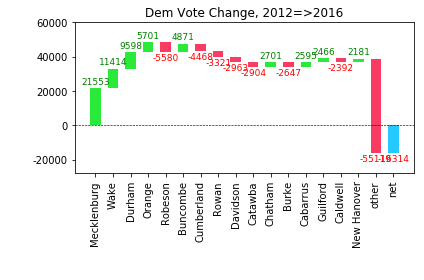

In [38]:
waterfall_chart.plot(mydf['GEO.display-label'].str.replace(' County.*', ''),
                     mydf['dem_vote_change'], 
                     sorted_value=True, 
                     threshold=.1, 
                     formatting='{:.0f}',
                     rotation_value=90,
                     Title='Dem Vote Change, 2012=>2016'
                    ).savefig(state_static_dir+"d_votes_waterfall.png",dpi=200,bbox_inches='tight')

R Turnout Successes

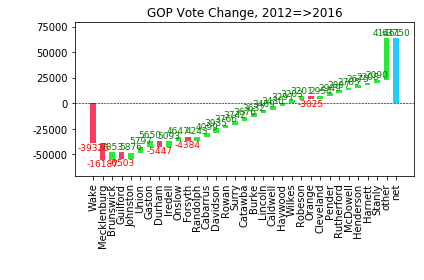

In [39]:
waterfall_chart.plot(mydf['GEO.display-label'].str.replace(' County.*', ''),
                     mydf['rep_vote_change'], 
                     sorted_value=True, 
                     threshold=.05, 
                     formatting='{:.0f}',
                     rotation_value=90,
                     Title='GOP Vote Change, 2012=>2016'
                    ).savefig(state_static_dir+"r_votes_waterfall.png",dpi=200,bbox_inches='tight')

R Net Votes Waterfall

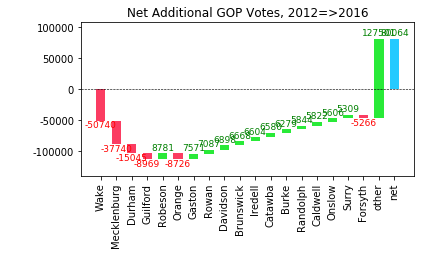

In [40]:
waterfall_chart.plot(mydf['GEO.display-label'].str.replace(' County.*', ''),
                     mydf['change_in_net_r_votes'], 
                     sorted_value=True, 
                     threshold=.1, 
                     formatting='{:.0f}',
                     rotation_value=90,
                     Title='Net Additional GOP Votes, 2012=>2016'
                    ).savefig(state_static_dir+"net_gop_votes_waterfall.png",dpi=200,bbox_inches='tight')

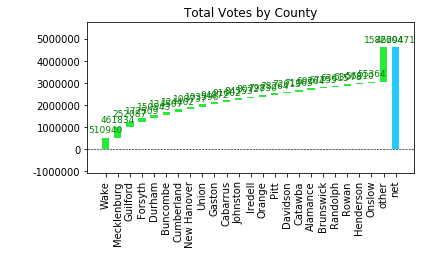

In [41]:
waterfall_chart.plot(mydf['GEO.display-label'].str.replace(' County.*', ''),
                     mydf['total_votes_2016'], 
                     sorted_value=True, 
                     threshold=.1, 
                     formatting='{:.0f}',
                     rotation_value=90,
                     Title='Total Votes by County'
                    ).savefig(state_static_dir+"tot_votes_waterfall.png",dpi=200,bbox_inches='tight')

pop_estimate_2017
Remember to readd margin-left:-200px to the generated HTML
    

In [42]:
# import plotly.plotly as py
# import plotly.graph_objs as go

# import numpy as np
# mydf['color'] = np.where(mydf['GEO.display-label'].str.contains('Stark|Mahoning|Columbiana|Carroll|Jefferson|Marrison|Tuscarnawas|Belmont|Guernsey|Monroe|Noble|Coshocton|Muskingum|Perry|Athens|Meigs|Vinton|Jackson'), 
#     'red', 
#     'black'
# )

# trace1 = go.Scatter3d(
#     x=mydf['total_votes_2016'],
#     y=mydf['High School Only or Less, 2012-2016'],
#     z=mydf['change_in_net_r_votes']/mydf['total_votes_2012'],
#     text=mydf['GEO.display-label'],
#     mode='markers',
#     marker=dict(
#         size=4,
#         color=mydf['color'],
#         line=dict(
#             color='rgba(217, 217, 217, 0.14)',
#             width=0.5
#         ),
#         opacity=0.8,
#     )
# )
# data = [trace1]
# layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     ),
#     scene = dict(
#         aspectmode='cube',
#         xaxis = dict(title='total votes'),
#         yaxis = dict(title='High School Only or Less, 2012-2016'),
#         zaxis = dict(title='Change in votes'),
#     ),

#     )
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig)

Where are the older people?
`

In [43]:
# counties = alt.topo_feature(vega_data.us_10m.url, 'counties')
# states = alt.topo_feature(vega_data.us_10m.url, 'states')

# outlines = alt.Chart(states).mark_geoshape(
#     stroke='black'
# ).project('albersUsa')
    
# colors = alt.Chart(counties).mark_geoshape().encode(
#     color='males_over_45_rate:Q'
# ).transform_lookup(
#     lookup='id',
#     from_=alt.LookupData(df.dropna(subset=['males_over_45_rate']), 'id', ['males_over_45_rate'])
# ).project(
#     type='albersUsa'
# ).properties(
#     width=500,
#     height=300
# )
# colors + outlines
# chart.save('slides/static/misc/drugs.html')

Just State Bars

In [9]:
subset = df[
    ['votes_dem_2008','votes_gop_2008', 'votes_dem_2012', 'votes_gop_2012', 'votes_dem_2016', 'votes_gop_2016','votes_oth_2008','votes_oth_2012','votes_oth_2016', 'state_abbr']
][df.state_abbr.isin(states)].groupby('state_abbr').sum()

trace5 = go.Bar(
    x=subset.index,
    y=subset['votes_dem_2008'],
    name='Dem Votes 2008',
    marker=dict(color='#E0C0F4')
)
trace6 = go.Bar(
    x=subset.index,
    y=subset['votes_gop_2008'],
    name='GOP Votes 2008',
    marker=dict(color='#F0A58A')
)
trace1 = go.Bar(
    x=subset.index,
    y=subset['votes_dem_2012'],
    name='Dem Votes 2012',
    marker=dict(color='#816EF3')
)
trace2 = go.Bar(
    x=subset.index,
    y=subset['votes_gop_2012'],
    name='GOP Votes 2012',
    marker=dict(color='#E35F4C')
)
trace3 = go.Bar(
    x=subset.index,
    y=subset['votes_dem_2016'],
    name='Dem Votes 2016',
    marker=dict(color='#092EAC')
)
trace4 = go.Bar(
    x=subset.index,
    y=subset['votes_gop_2016'],
    name='GOP Votes 2016',
    marker=dict(color='#BC1520')
)
trace7 = go.Bar(
    x=subset.index,
    y=subset['votes_oth_2008'],
    name='Other Votes 2008'
)
trace8 = go.Bar(
    x=subset.index,
    y=subset['votes_oth_2012'],
    name='Other Votes 2012'
)
trace9 = go.Bar(
    x=subset.index,
    y=subset['votes_oth_2016'],
    name='Other Votes 2016'
)
data=[trace5, trace6, trace1, trace2, trace3, trace4, trace7, trace8, trace9]
layout = go.Layout(barmode='group', title=",".join(states)+' Turnout Bars')
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=static_dir+'/turnout_bars.html')



'file:///Users/bwarren/SideProjects/voting/slides/static/turnout_bars.html'

In [45]:
# import plotly.plotly as py
# import plotly.graph_objs as go

# import numpy as np
# mydf['color'] = np.where(mydf['GEO.display-label'].str.contains('Stark|Mahoning|Columbiana|Carroll|Jefferson|Marrison|Tuscarnawas|Belmont|Guernsey|Monroe|Noble|Coshocton|Muskingum|Perry|Athens|Meigs|Vinton|Jackson'), 
#     'red', 
#     'black'
# )
# trace1 = go.Scatter3d(
#     x=mydf['males_over_45']/mydf['pop_estimate_2017'],
#     y=mydf['High School Only or Less, 2012-2016'],
#     z=mydf['votes_gop_2016']/mydf['votes_gop_2012'],
#     text=mydf['GEO.display-label'],
#     mode='markers',
#     marker=dict(
#         size=4,
#         color='black',
#         line=dict(
#             color='rgba(217, 217, 217, 0.14)',
#             width=0.5
#         ),
#         opacity=0.8,
#     )
# )
# data = [trace1]
# layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     ),
#     scene = dict(
#         aspectmode='cube',
#         xaxis = dict(title='X'),
#         yaxis = dict(title='High School Only or Less, 2012-2016'),
#         zaxis = dict(title='Change in votes'),
#     ),

#     )
# fig = go.Figure(data=data, layout=layout)
# plotly.offline.plot(fig)

Old person / total pop vs % change in R votes

In [46]:

# trace = go.Scatter(
#     x = mydf['males_over_45']/mydf['pop_estimate_2017'],
#     y = mydf['votes_gop_2016']/mydf['votes_gop_2012'],
#     mode = 'markers',
#     text=df_flipped.State,
#     marker = dict(
#         size = 10,
#         color = 'yellow',
#         line = dict(
#             width = 2,
#             color = 'rgb(0, 0, 0)'
#         )
#     )
# )
# data = [trace]

# layout = dict(
#               yaxis = dict(zeroline = False, title='Y'),
#               xaxis = dict(zeroline = False, title='X'),
#               width=600,
#               height=500,
#              )

# fig = dict(data=data, layout=layout)

# # IPython notebook
# plotly.offline.plot(fig)


Specific County Bars

In [47]:
# mydf.columns
ids = mydf[['change_in_net_r_votes', 'id']].sort_values(by='change_in_net_r_votes')
ids

,change_in_net_r_votes,id
6,-50740,37183
307,-37740,37119
995,-15045,37063
584,-8969,37081
408,-8726,37135
...,...,...
1880,6668,37019
2118,6898,37057
1708,7087,37159
1388,7571,37071


Top D gain counties

In [48]:
ids = mydf[['change_in_net_r_votes', 'id']].sort_values(by='change_in_net_r_votes')[:10]['id']

subset = df[
    ['votes_dem_2008','votes_gop_2008', 'votes_dem_2012', 'votes_gop_2012', 'votes_dem_2016', 'votes_gop_2016', 'state_abbr', 'id', 'GEO.display-label']
][df.id.isin(ids.values)]

trace5 = go.Bar(
    x=subset['GEO.display-label'],
    y=subset['votes_dem_2008'],
    name='Dem Votes 2008',
    marker=dict(color='#E0C0F4')
)
trace6 = go.Bar(
    x=subset['GEO.display-label'],
    y=subset['votes_gop_2008'],
    name='GOP Votes 2008',
    marker=dict(color='#F0A58A')
)
trace1 = go.Bar(
    x=subset['GEO.display-label'],
    y=subset['votes_dem_2012'],
    name='Dem Votes 2012',
    marker=dict(color='#816EF3')    
)
trace2 = go.Bar(
    x=subset['GEO.display-label'],
    y=subset['votes_gop_2012'],
    name='GOP Votes 2012',
    marker=dict(color='#E35F4C')
)
trace3 = go.Bar(
    x=subset['GEO.display-label'],
    y=subset['votes_dem_2016'],
    name='Dem Votes 2016',
    marker=dict(color='#092EAC')
)
trace4 = go.Bar(
    x=subset['GEO.display-label'],
    y=subset['votes_gop_2016'],
    name='GOP Votes 2016',
    marker=dict(color='#BC1520')
)
trace7 = go.Bar(
    x=subset['GEO.display-label'],
    y=subset['votes_gop_2016']-subset['votes_gop_2012'],
    name='GOP Vote Gain 2012=>2016'
)
trace8 = go.Bar(
    x=subset['GEO.display-label'],
    y=subset['votes_dem_2016']-subset['votes_dem_2012'],
    name='Dem Vote Gain 2012=>2016'
)
trace9 = go.Bar(
    x=subset['GEO.display-label'],
    y=(subset['votes_dem_2016']-subset['votes_gop_2016'])-(subset['votes_dem_2012']-subset['votes_gop_2012']),
    name='Net Dem Vote Gain 2012=>2016'
)

data=[trace5, trace6, trace1, trace2, trace3, trace4, trace7, trace8, trace9]
layout = go.Layout(barmode='group', title='Top Dem Vote Gain Counties')
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=state_static_dir+'top_d_vote_gain_county_bars.html')



'file:///Users/bwarren/SideProjects/voting/slides/static/NC/top_d_vote_gain_county_bars.html'

In [49]:
ids = mydf[['change_in_net_r_votes', 'id']].sort_values(by='change_in_net_r_votes', ascending=False)[:10]['id']

subset = df[
    ['votes_dem_2008','votes_gop_2008', 'votes_dem_2012', 'votes_gop_2012', 'votes_dem_2016', 'votes_gop_2016', 'state_abbr', 'id', 'GEO.display-label']
][df.id.isin(ids.values)]

trace5 = go.Bar(
    x=subset['GEO.display-label'],
    y=subset['votes_dem_2008'],
    name='Dem Votes 2008',
    marker=dict(color='#E0C0F4')
)
trace6 = go.Bar(
    x=subset['GEO.display-label'],
    y=subset['votes_gop_2008'],
    name='GOP Votes 2008',
    marker=dict(color='#F0A58A')
)
trace1 = go.Bar(
    x=subset['GEO.display-label'],
    y=subset['votes_dem_2012'],
    name='Dem Votes 2012',
    marker=dict(color='#816EF3')
)
trace2 = go.Bar(
    x=subset['GEO.display-label'],
    y=subset['votes_gop_2012'],
    name='GOP Votes 2012',
    marker=dict(color='#E35F4C')
)
trace3 = go.Bar(
    x=subset['GEO.display-label'],
    y=subset['votes_dem_2016'],
    name='Dem Votes 2016',
    marker=dict(color='#092EAC'),
)
trace4 = go.Bar(
    x=subset['GEO.display-label'],
    y=subset['votes_gop_2016'],
    name='GOP Votes 2016',
    marker=dict(color='#BC1520')
)
trace7 = go.Bar(
    x=subset['GEO.display-label'],
    y=subset['votes_gop_2016']-subset['votes_gop_2012'],
    name='GOP Vote Gain 2012=>2016'
)
trace8 = go.Bar(
    x=subset['GEO.display-label'],
    y=subset['votes_dem_2016']-subset['votes_dem_2012'],
    name='Dem Vote Gain 2012=>2016'
)
trace9 = go.Bar(
    x=subset['GEO.display-label'],
    y=(subset['votes_gop_2016']-subset['votes_dem_2016'])-(subset['votes_gop_2012']-subset['votes_dem_2012']),
    name='Net R Vote Gain 2012=>2016'
)


data=[trace5, trace6, trace1, trace2, trace3, trace4, trace7, trace8, trace9]
layout = go.Layout(barmode='group', title='Top GOP Vote Gain Counties')
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=state_static_dir+'top_r_vote_gain_county_bars.html')





'file:///Users/bwarren/SideProjects/voting/slides/static/NC/top_r_vote_gain_county_bars.html'

In [50]:
hist_data = [mydf['dem_percent_increase'], mydf['rep_percent_increase'], mydf['republican_shift']]
group_labels=['Dem Vote (2016-2012)/2012', 'GOP Vote (2016-2012)/2012', 'Republican Shift']
fig = ff.create_distplot(hist_data, group_labels, bin_size=5)
plotly.offline.plot(fig, filename=state_static_dir+'distributions.html')

'file:///Users/bwarren/SideProjects/voting/slides/static/NC/distributions.html'